In [ ]:
import re, numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential,load_model
from keras.preprocessing.text import Tokenizer#break a string into tokens. 
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,LSTM,Embedding

from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
cd drive/MyDrive/deeplearningprojects/RNN/spam\ -ham/

/content/drive/MyDrive/deeplearningprojects/RNN/spam -ham


Load the data into Pandas dataframe

In [ ]:
data=pd.read_csv("spam.csv",encoding='latin-1')

In [ ]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


To check missing values

In [ ]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Drop the columns that are not required for the neural network.

In [ ]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
data.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Visualization

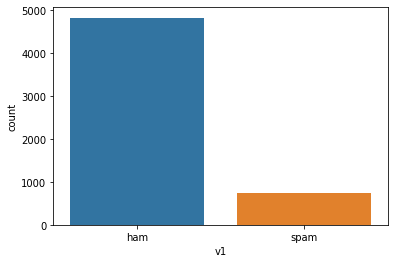

In [ ]:
sns.countplot(data['v1'])

In [ ]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
data['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
data['v2'].iloc[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
data['v2']=data['v2'].apply(lambda x:x.lower())
data['v2']=data['v2'].apply(lambda x:re.sub(pattern='[^a-z0-9\s]*',repl='',string=x))


Tokenize the data into sequence of tokens. Then pad/truncate the data so that every sequence is of same length.


In [ ]:
max_features=2000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(data['v2'].values)
seq=tokenizer.texts_to_sequences(data['v2'].values)
seq = pad_sequences(seq)


In [ ]:
seq[1]

[48, 312, 1399, 444, 6, 1823]

In [ ]:
len(seq)

5572

In [ ]:
y=pd.get_dummies(data['v1'],drop_first=True)

split data into training and testing sets


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(seq,y,test_size=0.3,random_state=1)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3900, 152), (1672, 152), (3900, 1), (1672, 1))

Define and compile the model.  LSTM network with dropouts to prevent overfitting

In [ ]:
model = Sequential()

In [ ]:
model.add(Embedding(input_dim=max_features,output_dim=32,input_length=152))
model.add(LSTM(units=32,dropout=0.3,recurrent_dropout=0.3))
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=10,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
390/390 [==============================] - 91s 233ms/step - loss: 0.0311 - accuracy: 0.9908 - val_loss: 0.0678 - val_accuracy: 0.9827
Epoch 2/10
390/390 [==============================] - 88s 226ms/step - loss: 0.0269 - accuracy: 0.9918 - val_loss: 0.0807 - val_accuracy: 0.9833
Epoch 3/10
390/390 [==============================] - 90s 230ms/step - loss: 0.0272 - accuracy: 0.9910 - val_loss: 0.0926 - val_accuracy: 0.9779
Epoch 4/10
390/390 [==============================] - 89s 229ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.0756 - val_accuracy: 0.9844
Epoch 5/10
390/390 [==============================] - 91s 233ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.0814 - val_accuracy: 0.9803
Epoch 6/10
390/390 [==============================] - 89s 228ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0808 - val_accuracy: 0.9809
Epoch 7/10
390/390 [==============================] - 90s 231ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.0839 - val_ac

In [ ]:
 model.evaluate(x_test,y_test)

53/53 [==============================] - 3s 48ms/step - loss: 0.0840 - accuracy: 0.9791


[0.0840349942445755, 0.9790669679641724]

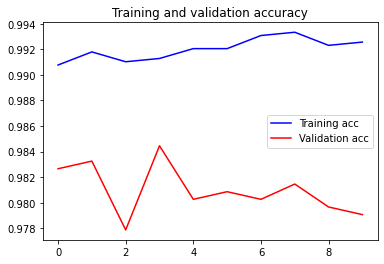

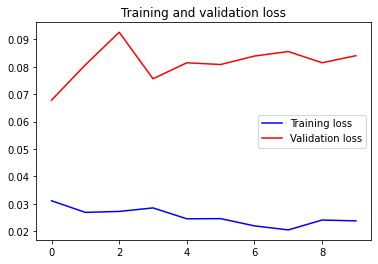

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
